# Descarga base de datos CHIRPS.





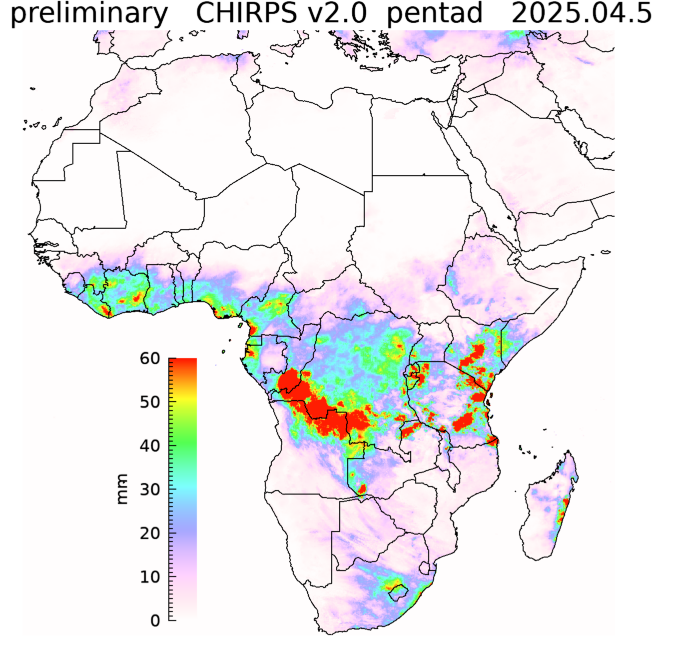



In [1]:
import xarray as xr
import requests
import re
import numpy as np
import os
import time

patron_name = r".+(\d{4})\.days"

url_links = []

for año in np.arange(1981,2025,1):
    
    url = r"https://data.chc.ucsb.edu/products/CHIRPS-2.0/global_daily/netcdf/p05/chirps-v2.0.{año}.days_p05.nc".format(año=año)
    url_links.append(url)

In [2]:
url_links[:5]

['https://data.chc.ucsb.edu/products/CHIRPS-2.0/global_daily/netcdf/p05/chirps-v2.0.1981.days_p05.nc',
 'https://data.chc.ucsb.edu/products/CHIRPS-2.0/global_daily/netcdf/p05/chirps-v2.0.1982.days_p05.nc',
 'https://data.chc.ucsb.edu/products/CHIRPS-2.0/global_daily/netcdf/p05/chirps-v2.0.1983.days_p05.nc',
 'https://data.chc.ucsb.edu/products/CHIRPS-2.0/global_daily/netcdf/p05/chirps-v2.0.1984.days_p05.nc',
 'https://data.chc.ucsb.edu/products/CHIRPS-2.0/global_daily/netcdf/p05/chirps-v2.0.1985.days_p05.nc']

In [3]:
url_links[-1]

'https://data.chc.ucsb.edu/products/CHIRPS-2.0/global_daily/netcdf/p05/chirps-v2.0.2024.days_p05.nc'

In [ ]:
from datetime import datetime

current_time = datetime.today().strftime('%Y-%m-%d %H:%M:%S')
print(f"Starting download at :{current_time}\n")

south_america {  
                'lat_max': 13.592638486971083,
                'lon_min': -84.0833129206595,
                'lat_min': -53.43306775676489,
                'lon_max':   -34.73304413246237
                }


lat_min,lat_max = (south_america['lat_min'], south_america['lat_max'])
lon_min,lon_max = (south_america['lon_min'], south_america['lon_max'])
print("\n")

## All South America
print("Downloading all south america")
## lat_min,lat_max = (-53.43306775676489, 13.592638486971083)
## lon_min,lon_max = (-84.0833129206595,  -34.73304413246237)

print(f"Latitud boundaries : {(lat_min,lat_max)}")
print(f"Longitude boundaries : {(lon_min,lon_max)}")


## Url update 27/12/2024
url_directory = r"D:\OneDrive\OneDrive - INTERCONEXION ELECTRICA S.A. E.S.P\01_CC_DOC\1_Raw_Data\4_Rain\03_ChirpsRainFall_SouthAmericaV2"
already_download = os.listdir(url_directory)

print(f"Amount of files downloaded {already_download}\n")
print(f"All files are going into the following directory\n {url_directory}\n")

print("Downloding files from CHIRPS.\nAll South AMerica.")

for index,chirp_url in enumerate(url_links,start=1):
    
    
    year = re.match(patron_name,string = chirp_url).group(1)
    
    found_it = False
    
    for ready in already_download:
        if str(year) in ready:
            found_it = True
            break
        else:
            continue
            
    if found_it:
        print(f"Year:{year} already downloaded")
        continue
    
    
    print(f"Working on {year}")
    response = requests.get(chirp_url)

    if response.status_code == 200:
        print("\tSucceful catch link")
        # If the request was successful (status code 200), you can access the content of the URL
        content = response.content
        # Save the content to a file
        
        with open(os.path.join(url_directory, f"chirp_delete_{index}.nc" ), "wb") as f:
            f.write(content)
        # Now open the file with xarray and dask
        ds = xr.open_dataset(f"chirp_delete_{index}.nc")

        sothAmerica_slice = ds.sel(latitude = slice(lat_min,lat_max) ,longitude = slice(lon_min,lon_max))


        if index == 1:

            print("\n")
            lat_start = ds.latitude.values[0]
            lat_end = ds.latitude.values[-1]

            lon_start = ds.longitude.values[0]
            lon_end = ds.longitude.values[-1]

            lat_start_southA = np.min(sothAmerica_slice.latitude.values)
            lat_end_southA = np.max(sothAmerica_slice.latitude.values)

            lon_start_southA = np.min(sothAmerica_slice.longitude.values)
            lon_end_southA = np.max(sothAmerica_slice.longitude.values)

            print(f"Whole range of values ({lat_start}, {lat_end}) & ({lon_start}, {lon_end}) ")
            print(f"After slice ({lat_start_southA}, {lat_end_southA}) & ({lon_start_southA}, {lon_end_southA})")
            print("\n")

        
        print(f"\t//Storing Results from year :\t{year} [...] //\n")
        sothAmerica_slice.to_netcdf(f"CHIRPS_daily_{year}.nc")
        
        ds.close()

        print("\t\tSucceful Download files.")
        time.sleep(60)
        os.remove(f"chirp_delete_{index}.nc")
       
    else:
        print("Failed to fetch URL:", response.status_code)
        
    

Starting download at :2024-12-27 08:56:54



Latitud boundaries : (-53.43306775676489, 13.592638486971083)
Longitude boundaries : (-84.0833129206595, -34.73304413246237)
Amount of files downloaded []

All files are going into the following directory
 D:\OneDrive\OneDrive - INTERCONEXION ELECTRICA S.A. E.S.P\01_CC_DOC\1_Raw_Data\4_Rain\03_ChirpsRainFall_SouthAmericaV2

Downloding files from CHIRPS.
All South AMerica.
Working on 1981
	Succeful catch link


Whole range of values (-49.974998474121094, 49.974998474121094) & (-179.97500610351562, 179.97500610351562) 
After slice (-49.974998474121094, 13.574996948242188) & (-84.07500457763672, -34.77500915527344)


	//Storing Results from year :	1981 [...] //

		Succeful Download files.
Working on 1982
	Succeful catch link
	//Storing Results from year :	1982 [...] //

		Succeful Download files.
Working on 1983
	Succeful catch link
	//Storing Results from year :	1983 [...] //

		Succeful Download files.
Working on 1984
	Succeful catch link
	//

## Verify

Fecha : `27/12/2024`

Consluion : Datos Completos.

In [ ]:
import os
from verify_download import verify_completness

url_output = r"D:\OneDrive\OneDrive - INTERCONEXION ELECTRICA S.A. E.S.P\01_CC_DOC\1_Raw_Data\4_Rain\03_ChirpsRainFall_SouthAmericaV2"
chirps_pr = [os.path.join( url_output, var ) for var in os.listdir(url_output) if '.txt' not in var]

In [2]:
verify_completness(txt_names = chirps_pr,var_name=  'precip',time_name = 'time')

CHIRPS_daily_1981.nc
Dates complete
	Complete

CHIRPS_daily_1982.nc
Dates complete
	Complete

CHIRPS_daily_1983.nc
Dates complete
	Complete

CHIRPS_daily_1984.nc
Dates complete
	Complete

CHIRPS_daily_1985.nc
Dates complete
	Complete

Going good with 5
CHIRPS_daily_1986.nc
Dates complete
	Complete

CHIRPS_daily_1987.nc
Dates complete
	Complete

CHIRPS_daily_1988.nc
Dates complete
	Complete

CHIRPS_daily_1989.nc
Dates complete
	Complete

CHIRPS_daily_1990.nc
Dates complete
	Complete

Going good with 10
CHIRPS_daily_1991.nc
Dates complete
	Complete

CHIRPS_daily_1992.nc
Dates complete
	Complete

CHIRPS_daily_1993.nc
Dates complete
	Complete

CHIRPS_daily_1994.nc
Dates complete
	Complete

CHIRPS_daily_1995.nc
Dates complete
	Complete

Going good with 15
CHIRPS_daily_1996.nc
Dates complete
	Complete

CHIRPS_daily_1997.nc
Dates complete
	Complete

CHIRPS_daily_1998.nc
Dates complete
	Complete

CHIRPS_daily_1999.nc
Dates complete
	Complete

CHIRPS_daily_2000.nc
Dates complete
	Complete

Goin

In [2]:
import xarray as xr
import os


In [3]:
path = r"C:\Users\Usuario\OneDrive - INTERCONEXION ELECTRICA S.A. E.S.P\01_CC_DOC\data\4_Rain\03_ChirpsRainFall_SouthAmericaV2"

folder_files = [os.path.join(path , var) for var in os.listdir(path)]

In [5]:
chirps_rain = xr.open_mfdataset(folder_files, chunks={'time':'auto'})

In [6]:
chirps_rain

<xarray.Dataset> Size: 81GB
Dimensions:    (time: 16040, latitude: 1272, longitude: 987)
Coordinates:
  * latitude   (latitude) float32 5kB -49.97 -49.92 -49.88 ... 13.47 13.52 13.57
  * longitude  (longitude) float32 4kB -84.08 -84.03 -83.98 ... -34.82 -34.78
  * time       (time) datetime64[ns] 128kB 1981-01-01 1981-01-02 ... 2024-11-30
Data variables:
    precip     (time, latitude, longitude) float32 81GB dask.array<chunksize=(365, 255, 198), meta=np.ndarray>
Attributes: (12/15)
    Conventions:       CF-1.6
    title:             CHIRPS Version 2.0
    history:           created by Climate Hazards Group
    version:           Version 2.0
    date_created:      2015-11-20
    creator_name:      Pete Peterson
    ...                ...
    reference:         Funk, C.C., Peterson, P.J., Landsfeld, M.F., Pedreros,...
    comments:           time variable denotes the first day of the given day.
    acknowledgements:  The Climate Hazards Group InfraRed Precipitation with ...
    ftp_url:           ftp://chg-ftpout.geog.ucsb.edu/pub/org/chg/products/CH...
    website:           http://chg.geog.ucsb.edu/data/chirps/index.html
    faq:               http://chg-wiki.geog.ucsb.edu/wiki/CHIRPS_FAQ

In [7]:
chirps_rain.precip

<xarray.DataArray 'precip' (time: 16040, latitude: 1272, longitude: 987)> Size: 81GB
dask.array<concatenate, shape=(16040, 1272, 987), dtype=float32, chunksize=(366, 255, 198), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 5kB -49.97 -49.92 -49.88 ... 13.47 13.52 13.57
  * longitude  (longitude) float32 4kB -84.08 -84.03 -83.98 ... -34.82 -34.78
  * time       (time) datetime64[ns] 128kB 1981-01-01 1981-01-02 ... 2024-11-30
Attributes:
    units:               mm/day
    standard_name:       convective precipitation rate
    long_name:           Climate Hazards group InfraRed Precipitation with St...
    time_step:           day
    geostatial_lat_min:  -50.0
    geostatial_lat_max:  50.0
    geostatial_lon_min:  -180.0
    geostatial_lon_max:  180.0

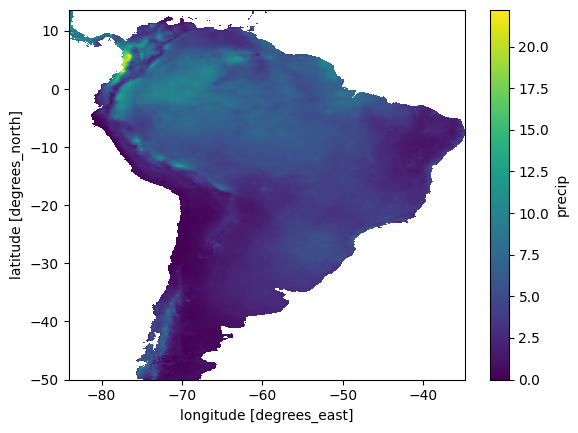

In [9]:
chirps_rain.precip.mean(dim ='time').plot()